## Research Question 2 
 In what manner does the material composition of water mains impact the probability and susceptibility of the water main to experience breakage or failure?

In [1]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt

## Merge the datasets
Again merge the watermain attribures and breaks. Basically redoing some parts from question 1

In [2]:
#read in both datasets
watermain_att = pd.read_csv('Watermain_Attributes.csv')
water_breaks = pd.read_csv('Watermain_Breaks_Reporting.csv')

In [3]:
#Changing watermain_att column for work order ids to match the water_breaks column so i can merge the datasets
watermain_att = watermain_att.rename(columns = {'WORKORDERI': 'Work Order ID'})

In [4]:
#merging the two data sets
merged_df = pd.merge(watermain_att, water_breaks, on='Work Order ID')

In [6]:
#changing the column installdat to datetime so it is easier to work with
merged_df['INSTALLDAT'] = pd.to_datetime(merged_df['INSTALLDAT'], errors = 'coerce')

## Cleaning Data
Cleaning data again to only contain the columns I need to look at 

In [7]:
merged_df['MATERIAL']

0      CI
1      CI
2      DI
3      DI
4      CI
       ..
857    CI
858    DI
859    CI
860    CI
861    CI
Name: MATERIAL, Length: 862, dtype: object

In [8]:
#Only keeping the columns that I will be working with to make the data more readable
clean_df = merged_df[['Work Order ID','MATERIAL','Priority', 'Actual Start', 'Actual Finish',
                     'Canceled', 'INSTALLDAT']].copy()
# Change the Actual Start into a date time object so I can make a new column using start and install date
clean_df['Actual Start'] = pd.to_datetime(clean_df['Actual Start'])

In [9]:
#Decided to drop rows that contain a null value in the actual start because I do not know when the watermain break
# occured and that could hurt the data
clean_df = clean_df.dropna(subset = ['Actual Start'])

In [10]:
#I wanted to see if there were any cancleled work orders in the dataset because even though I do not know why it was canceled
#the pipe is probably not broken and there was a different problem. 
clean_df = clean_df[clean_df['Canceled'] != 'Y']

In [11]:
#Create the new column pipe age that represents how long the pipe went without breaking
clean_df['Pipe_Life'] = clean_df['Actual Start'].dt.year - clean_df['INSTALLDAT'].dt.year
clean_df

,Work Order ID,MATERIAL,Priority,Actual Start,Actual Finish,Canceled,INSTALLDAT,Pipe_Life
1,348836,CI,1.0,2013-05-20 00:00:00,5/21/2013 0:00,N,1962-06-30,51.0
2,465957,DI,1.0,2015-08-03 13:29:00,8/3/2015 13:29,N,1978-07-24,37.0
3,382769,DI,1.0,2014-01-22 00:00:00,1/22/2014 0:00,N,1978-07-24,36.0
4,436334,CI,1.0,2015-01-31 00:00:00,1/31/2015 0:00,N,1960-01-01,55.0
5,476022,CI,1.0,2015-12-08 00:00:00,12/8/2015 0:00,N,1960-01-01,55.0
...,...,...,...,...,...,...,...,...
854,592400,CI,1.0,2018-12-12 06:00:00,12/12/2018 14:30,N,1940-01-01,78.0
855,477315,CI,1.0,2016-01-06 00:00:00,1/6/2016 6:00,N,1940-01-01,76.0
857,335133,CI,1.0,2013-01-28 00:00:00,1/28/2013 0:00,N,1950-01-01,63.0
860,758090,CI,1.0,2021-11-20 01:30:00,11/20/2021 9:30,N,1960-01-01,61.0


## Graph for water main material composition and pipe life
Below is the graph for the material composition of the pipes and average pipes life from that material

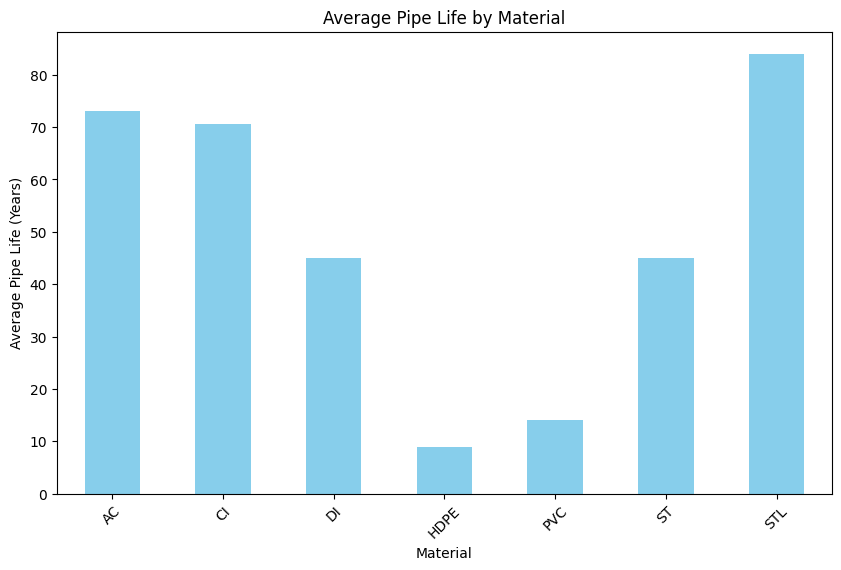

In [12]:
# Grouping by 'MATERIAL' and calculating the mean 'Pipe_Life' for each material
material_pipe_life = clean_df.groupby('MATERIAL')['Pipe_Life'].mean()

# Creating a bar plot
plt.figure(figsize=(10, 6))
material_pipe_life.plot(kind='bar', color='skyblue')
plt.title('Average Pipe Life by Material')
plt.xlabel('Material')
plt.ylabel('Average Pipe Life (Years)')
plt.xticks(rotation=45)
plt.show()

In [13]:
#I think it is important to check to see how many pipes are in each category and how it could be skewed
clean_df.groupby("MATERIAL").size()

MATERIAL
AC        1
CI      373
DI      103
HDPE      1
PVC       1
ST        1
STL       2
dtype: int64

In [14]:
#Checking to see how many are in the merged dataset not only the ones that have broken.
merged_df.groupby("MATERIAL").size()

MATERIAL
AC        5
CI      657
DI      195
HDPE      1
PVC       1
ST        1
STL       2
dtype: int64

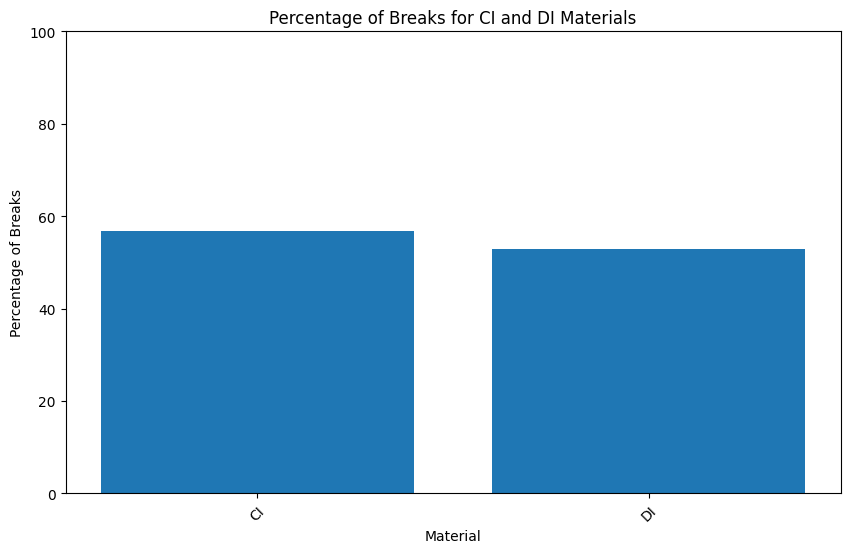

In [15]:
# Counts of breaks in clean_df
break_counts_clean = clean_df.groupby("MATERIAL").size()

# Total counts of water mains in merged_df
total_counts_merged = merged_df.groupby("MATERIAL").size()

# Calculate the percentage of breaks for CI and DI in clean_df
percentage_breaks_clean = (break_counts_clean[['CI', 'DI']] / total_counts_merged[['CI', 'DI']]) * 100

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(['CI', 'DI'], percentage_breaks_clean.values)
plt.xlabel('Material')
plt.ylabel('Percentage of Breaks')
plt.title('Percentage of Breaks for CI and DI Materials')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()

In [16]:
#Get exact percentages
percentage_breaks_clean

MATERIAL
CI    56.773212
DI    52.820513
dtype: float64

In [17]:
#From the findings I am going to get rid of everything besides CI / cast iron and DI / ductile iron because there is not enough of the other materials for them to be
#included in the findings
dropped_df = clean_df[clean_df['MATERIAL'].isin(['CI','DI'])]

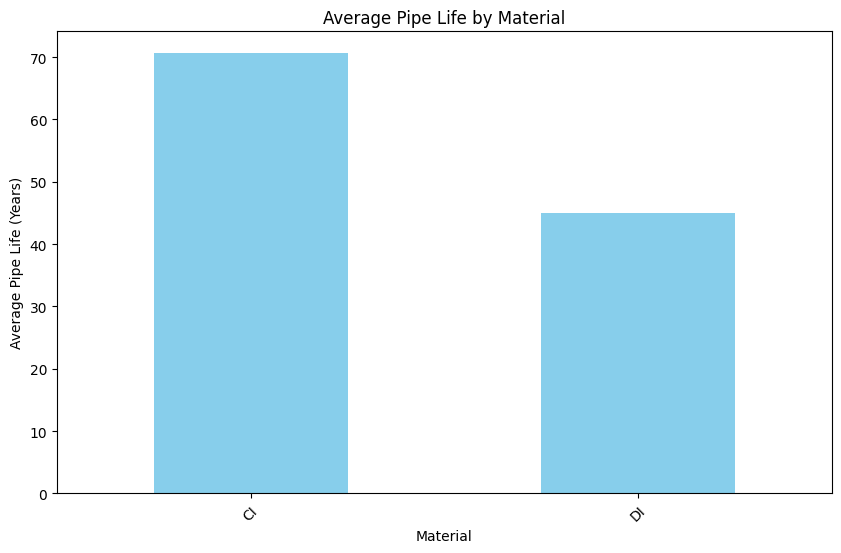

In [18]:
# Grouping by 'MATERIAL' and calculating the mean 'Pipe_Life' for each material
material_pipe_life_2 = dropped_df.groupby('MATERIAL')['Pipe_Life'].mean()

# Creating a bar plot
plt.figure(figsize=(10, 6))
material_pipe_life_2.plot(kind='bar', color='skyblue')
plt.title('Average Pipe Life by Material')
plt.xlabel('Material')
plt.ylabel('Average Pipe Life (Years)')
plt.xticks(rotation=45)
plt.show()

In [19]:
#Get the exact number of average pipe life
material_pipe_life_2

MATERIAL
CI    70.602941
DI    45.030000
Name: Pipe_Life, dtype: float64

In [20]:
#Curious about the install date of each of these materials to see if one is no longer used
dropped_df.groupby('MATERIAL')['INSTALLDAT'].mean()

MATERIAL
CI   1945-05-08 13:24:42.352941184
DI   1971-02-01 06:14:24.000000000
Name: INSTALLDAT, dtype: datetime64[ns]

In [21]:
#Looking to see when the last time each type of material was installed from the orginal dataframe so broken or not
merged_df.groupby('MATERIAL')['INSTALLDAT'].idxmax()


MATERIAL
AC      310
CI      601
DI      853
HDPE    324
PVC     309
ST      492
STL     517
Name: INSTALLDAT, dtype: int64

In [22]:
#Showing that last time Cast Iron was installed was 1966
merged_df.loc[601]

ENABLED                             1
FACILITYID                   00-18618
LOCATION                          NaN
INSTALLDAT        1966-12-19 00:00:00
SUBTYPE                             1
                         ...         
SR Closed By                      NaN
SR Date Closed                    NaN
SR Priority                       NaN
SR Status                         NaN
SR Address                        NaN
Name: 601, Length: 94, dtype: object

In [23]:
#Looking to see the first time ductile iron was used for a water main
merged_df.groupby('MATERIAL')['INSTALLDAT'].idxmin()


MATERIAL
AC      419
CI       69
DI      121
HDPE    324
PVC     309
ST      492
STL     495
Name: INSTALLDAT, dtype: int64

In [24]:
#Used to see the first time Ductile iron was used for a water main
merged_df.loc[121]

ENABLED                             1
FACILITYID                   00-14644
LOCATION                          NaN
INSTALLDAT        1950-01-01 00:00:00
SUBTYPE                             1
                         ...         
SR Closed By                   user21
SR Date Closed         3/5/2015 10:39
SR Priority                       2.0
SR Status                      CLOSED
SR Address              830 HEWETT DR
Name: 121, Length: 94, dtype: object

In [25]:
#checking to see if the priority of breaks is playing a factor from cast iron and ductile iron
dropped_df.groupby(['MATERIAL', 'Priority']).size()

MATERIAL  Priority
CI        1.0         356
          2.0           1
          3.0          13
DI        1.0          98
          3.0           4
dtype: int64

In [26]:
#needed to see the first time cast iron was used 
merged_df.loc[642]

ENABLED                     1
FACILITYID           00-19879
LOCATION          N Ashley St
INSTALLDAT                NaT
SUBTYPE                     1
                     ...     
SR Closed By              NaN
SR Date Closed            NaN
SR Priority               NaN
SR Status                 NaN
SR Address                NaN
Name: 642, Length: 94, dtype: object

In [27]:
#this code will allow me to see the different makeup of material contributing to the amount of breaks in age bins 50-79
# Create age bins
max_pipe_life = int(clean_df['Pipe_Life'].max())
bins = list(range(0, max_pipe_life + 11, 10))
labels = [f"{x}-{x+9}" for x in range(0, max_pipe_life + 1, 10)]

# Filter rows where 'Actual Start' is not null
broken_df = dropped_df.dropna(subset=['Actual Start'])

# Filter rows where 'Pipe_Life' falls within the 50-79 age range
age_range_df = broken_df[(broken_df['Pipe_Life'] >= 50) & (broken_df['Pipe_Life'] <= 79)]

# Group age_range_df by age bins and 'MATERIAL', then calculate the count of materials in each bin
material_counts_50_to_79 = age_range_df.groupby([pd.cut(age_range_df['Pipe_Life'], bins=bins, labels=labels, right=False), 'MATERIAL']).size().unstack(fill_value=0)

print(material_counts_50_to_79)


MATERIAL    CI  DI
Pipe_Life         
0-9          0   0
10-19        0   0
20-29        0   0
30-39        0   0
40-49        0   0
50-59      101  44
60-69      109   5
70-79       49   0
80-89        0   0
90-99        0   0
100-109      0   0
110-119      0   0


In [28]:
#I want to see the total amount of breaks per material
dropped_df.groupby('MATERIAL').size()

MATERIAL
CI    373
DI    103
dtype: int64

In [29]:
#To see the percentage of water mains for each material that broke within the age range of 50-79.
# Filter rows in 'dropped_df' where 'Actual Start' is not null
filtered_df = dropped_df.dropna(subset=['Actual Start'])

# Filter rows in 'filtered_df' where 'Pipe_Life' falls within the 50-79 age range
age_filtered_df = filtered_df[(filtered_df['Pipe_Life'] >= 50) & (filtered_df['Pipe_Life'] <= 79)]

# Group 'age_filtered_df' by 'MATERIAL' and calculate the percentage of breaks
percentage_breaks_by_material = age_filtered_df.groupby('MATERIAL').size() / age_filtered_df.shape[0] * 100

print(percentage_breaks_by_material)


MATERIAL
CI    84.090909
DI    15.909091
dtype: float64
